In [1]:
import gym
import numpy as np
import random
import matplotlib.pyplot as plt
import time 
from IPython.display import clear_output

In [2]:
env = gym.make("FrozenLake-v1")

action_space_size = env.action_space.n
state_space_size = env.observation_space.n

In [3]:
Q_table = np.zeros((state_space_size, action_space_size))

print(Q_table)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [4]:
num_of_episodes = 20000
max_steps_per_episode = 200

learning_rate = 0.1
discount_rate = 0.99

exploration_rate = 1

In [5]:
rewards_of_all_episodes = []

for episode in range(num_of_episodes):
    state = env.reset()
        
    done = False
    rewards_current_episode = 0
    
    for step in range(max_steps_per_episode):
        
        random_number = random.uniform(0,1)
        
        if random_number > exploration_rate:
            action = np.argmax(Q_table[state,:]) 
            
        else:
            action = env.action_space.sample() 
        
        new_state, reward, done, info = env.step(action)

        Q_table[state, action] = Q_table[state, action] * (1 - learning_rate) \
        + learning_rate * (reward + discount_rate * np.max(Q_table[new_state,:]))

        state = new_state
        rewards_current_episode = rewards_current_episode + reward
        
        if done == True:
            break
                
    exploration_rate = 1 - np.log(episode + 1) / np.log(num_of_episodes + 1)
        
    rewards_of_all_episodes.append(rewards_current_episode)  

Average reward per thousand episodes 

1000 : 0.095
2000 : 0.199
3000 : 0.207
4000 : 0.277
5000 : 0.324
6000 : 0.317
7000 : 0.315
8000 : 0.389
9000 : 0.423
10000 : 0.455
11000 : 0.442
12000 : 0.526
13000 : 0.537
14000 : 0.56
15000 : 0.543
16000 : 0.603
17000 : 0.641
18000 : 0.655
19000 : 0.701
20000 : 0.748


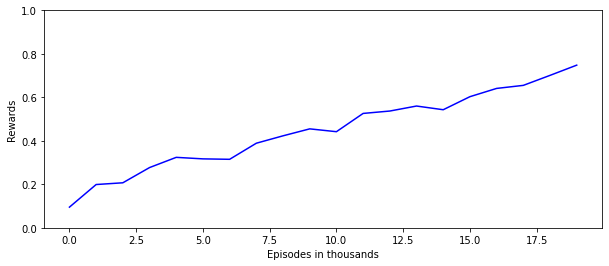



Q Table:
[[0.59931903 0.48899054 0.49258584 0.49062601]
 [0.40786768 0.34405345 0.29736172 0.51288819]
 [0.42099309 0.40880914 0.38589552 0.47616298]
 [0.33705928 0.33671123 0.29441454 0.46098865]
 [0.6188628  0.40567692 0.40327806 0.34678276]
 [0.         0.         0.         0.        ]
 [0.1725666  0.16553237 0.22328684 0.15279034]
 [0.         0.         0.         0.        ]
 [0.45364317 0.39447714 0.41284274 0.64152736]
 [0.32790416 0.6954633  0.40558977 0.39462899]
 [0.62273946 0.41190713 0.37737819 0.41144199]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.43707472 0.42355588 0.80614864 0.4053731 ]
 [0.75542095 0.89074158 0.69122797 0.73667027]
 [0.         0.         0.         0.        ]]


In [6]:
rewards_per_thousand_episodes = np.split(np.array(rewards_of_all_episodes),
                               num_of_episodes/1000)

reward_value_list = []

count = 1000
print("Average reward per thousand episodes \n")
for i in rewards_per_thousand_episodes:
    print(count, ":", str(sum(i) / 1000))
    
    current_reward_value = sum(i) / 1000
    reward_value_list.append(current_reward_value)
    count = count + 1000
    
    
plt.figure(figsize=(10,4))
plt.ylim(0,1)

plt.plot(reward_value_list, 'b', label='Training loss')
plt.xlabel('Episodes in thousands')
plt.ylabel('Rewards')
#plt.legend()
plt.show()

    

print("\n")
print("Q Table:")
print(Q_table)